In [33]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.mlab as mlab

def test_stationarity(timeseries): # Вывод результатов теста
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='t-stat')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [15]:
# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [16]:
data = pd.read_excel('data1.xls',encoding="utf-8",header=None,index_col=None)
data.columns = ['Value']
data.index = pd.date_range(start='2018-10-01',periods=100,freq='D')
data.index.name = 'Time'
data.head(20)

,Value
Time,
2018-10-01,0.012698
2018-10-02,0.022681
2018-10-03,-0.051218
2018-10-04,-0.022244
2018-10-05,-0.054943
2018-10-06,-0.012451
2018-10-07,-0.024440
2018-10-08,-0.135661
2018-10-09,-0.048282


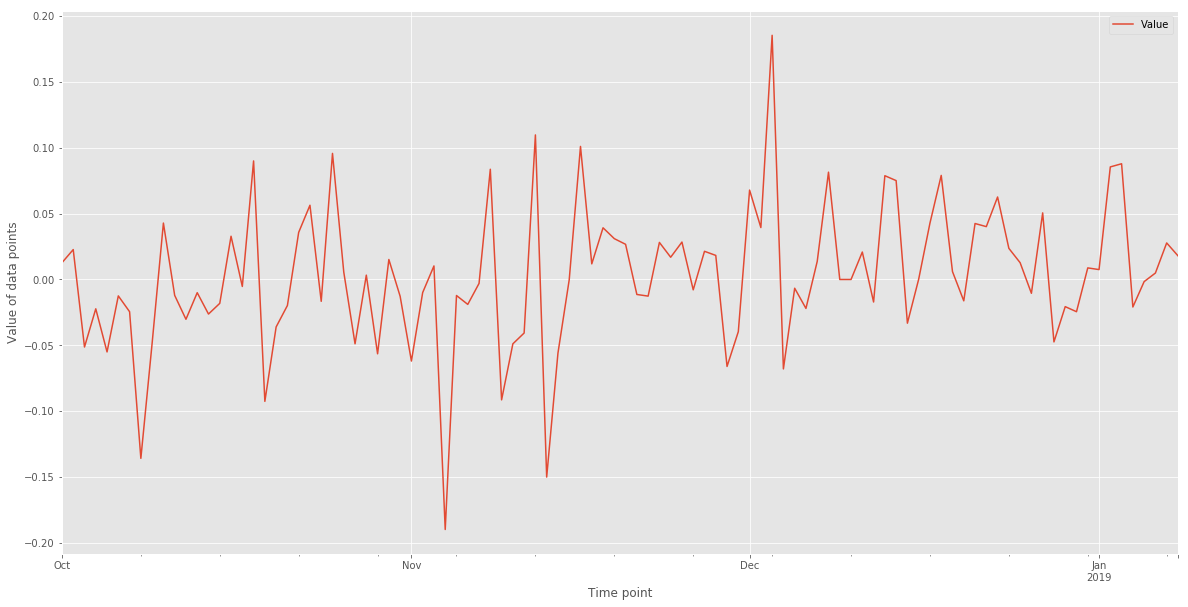

In [17]:
data.plot()
plt.ylabel('Value of data points')
plt.xlabel('Time point')
plt.show()

### Graph looks like white noise. Let's check this hypothesis!

In [18]:
print("Mean of time series: %f" % data['Value'].mean())
print("Standart deviation of time series: %f" % data['Value'].std())

Mean of time series: 0.002595
Standart deviation of time series: 0.054669


In [19]:
samples=np.array(data['Value'])
mean=np.mean(samples)
var=np.var(samples)
std=np.sqrt(var)

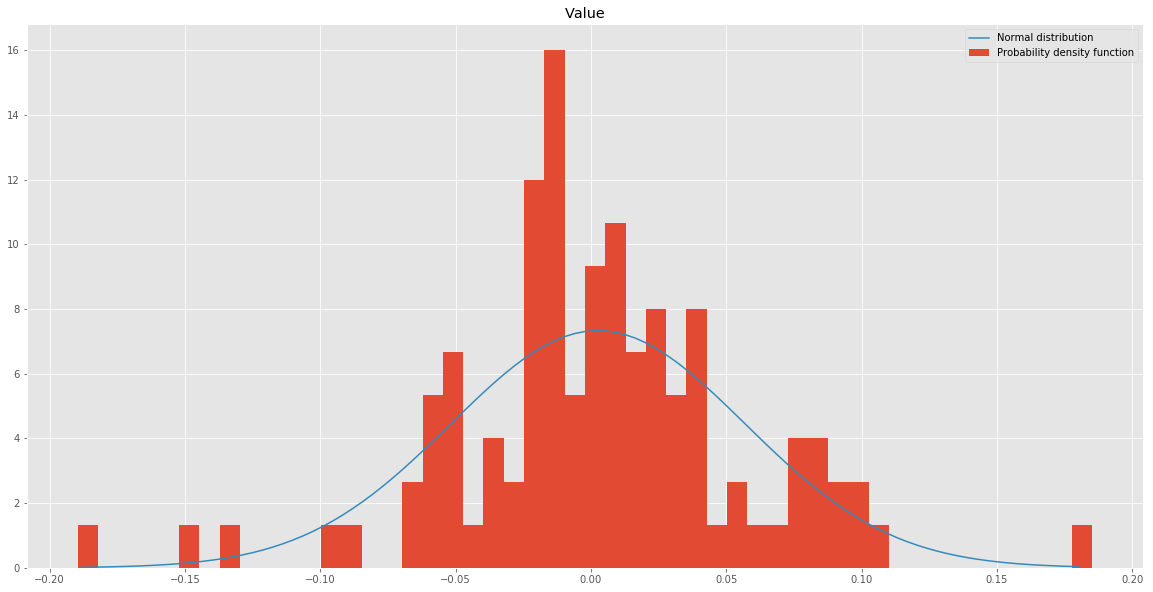

In [20]:
# Plot histogram
data.hist(bins = 50, normed=True,label="Probability density function")

data_norm = np.random.normal(mean,std,1000) # generate fake data
x = np.linspace(min(data_norm), max(data_norm), 100)
plt.plot(x, mlab.normpdf(x, mean, std),label="Normal distribution")
plt.legend()
plt.show()

### We can see that histogram of series has normal distribution

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


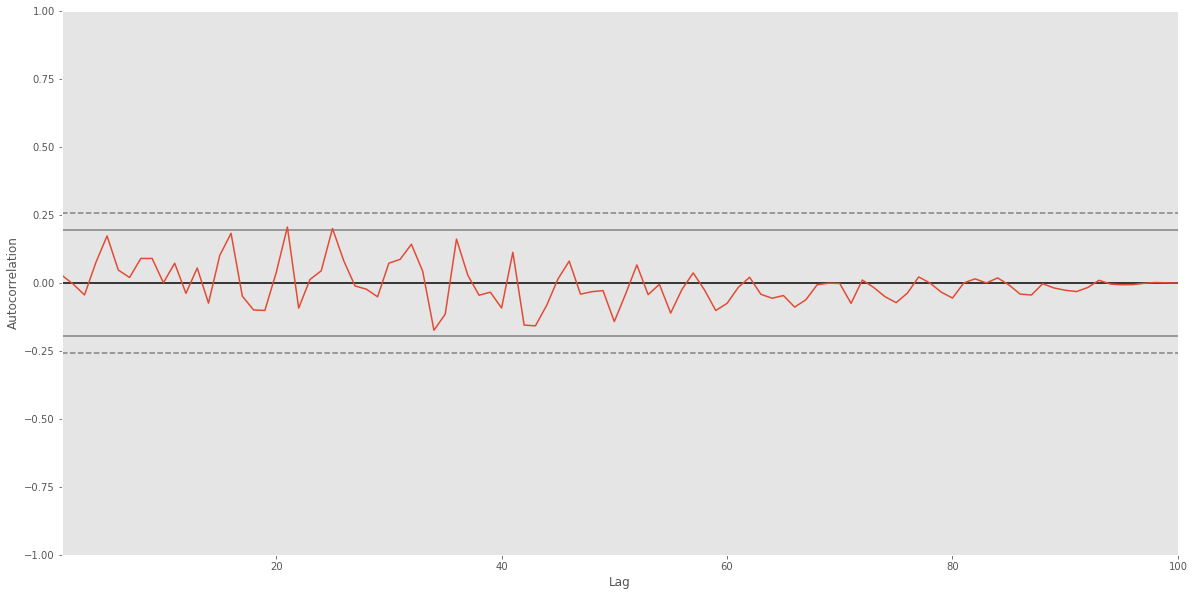

In [21]:
# autocorrelation
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data['Value'])
plt.show()

### There is no correlation between values in different time points.
### Represented time series is white noise -> It is impossible to build forecast.